# cognee - demo

## Let's tackle the problem first

## Since LLMs appeared, people have tried to personalize them.
## You usually saw that by people doing "prompt engineering" and adding specific instructions to the LLM
## "Become a sales agent" or "Become a programmer"

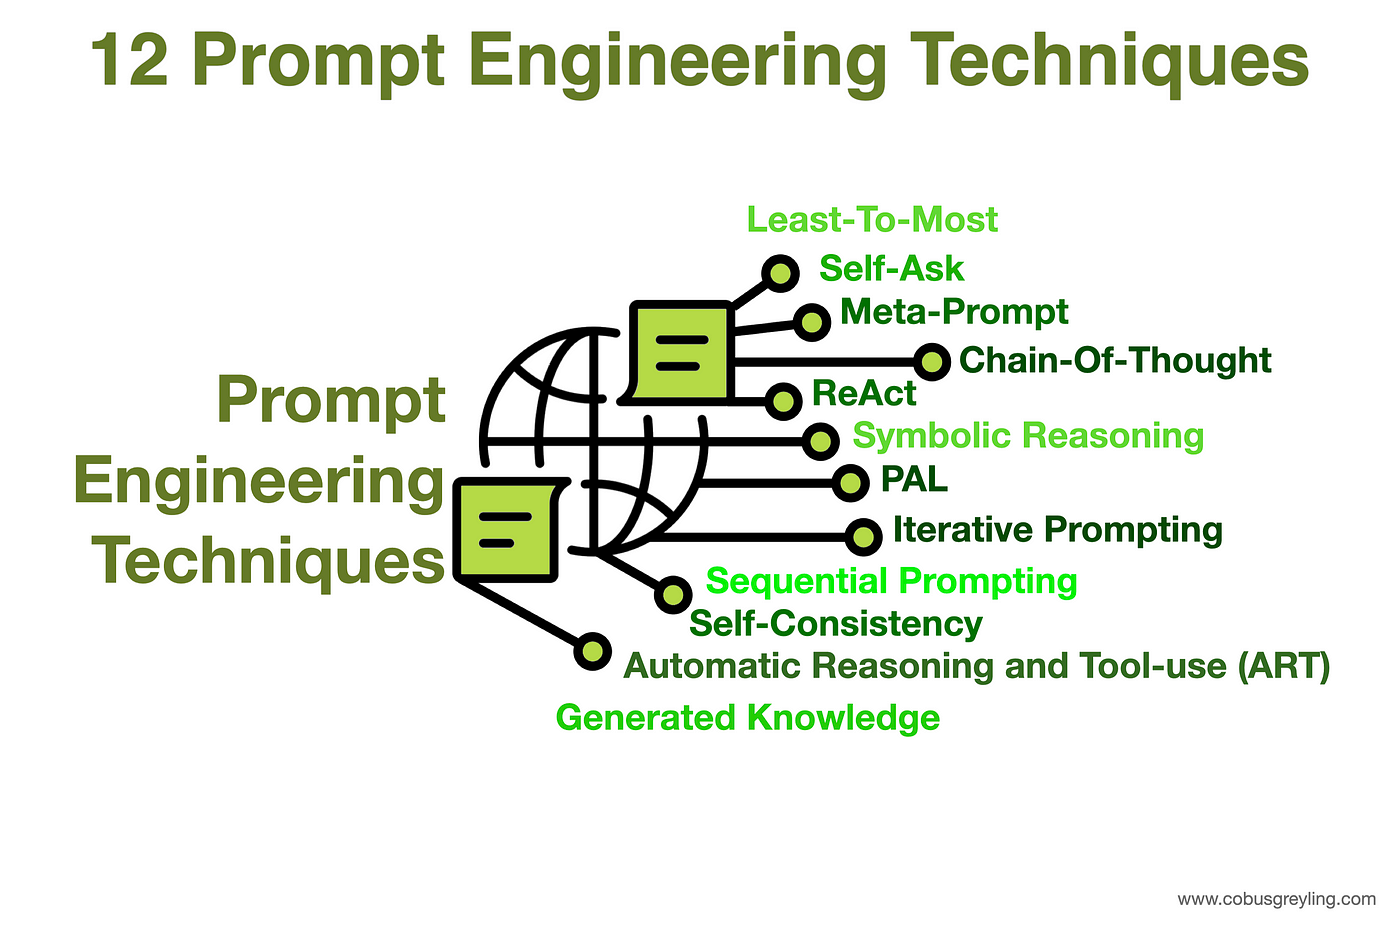

## The next popular thing was RAGs (Retrieval Augmented Generation) systems that connect to a vector store and search for similar data so they could enrich LLM response

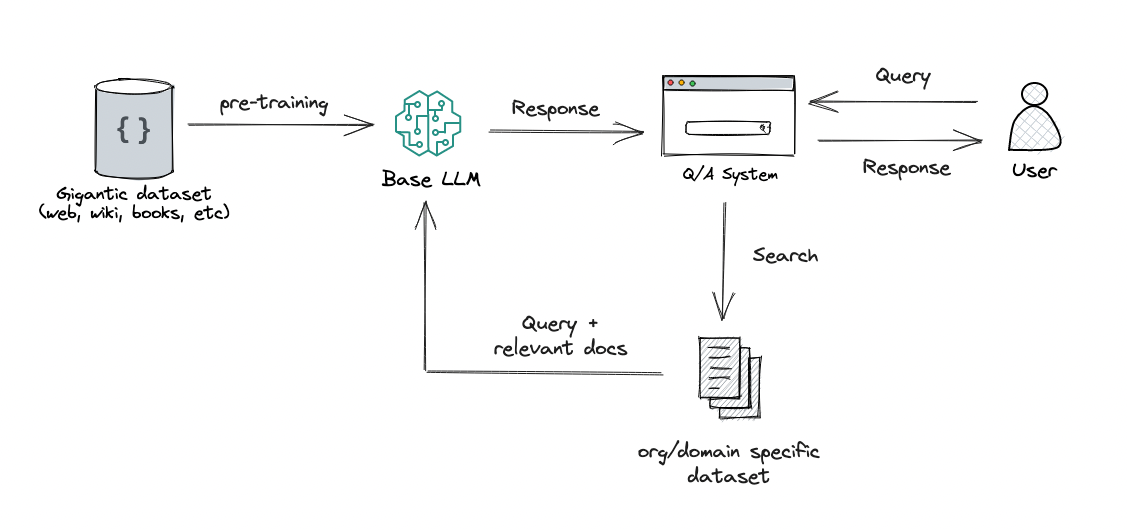


## The problem lies in the nature of the search. If you just find some keywords, and return one or many documents from vectorstore this way, you will have an issue with the the way you would use to organise and prioritise documents. 
## If you search  for an apple, you might get both the information of your last laptop purchase, and the information about apple as a fruit.
## This fact makes it difficult to use vector databases and implies we might need another layer on top of them to have a semantic model LLMs could use
## How about graphs? 

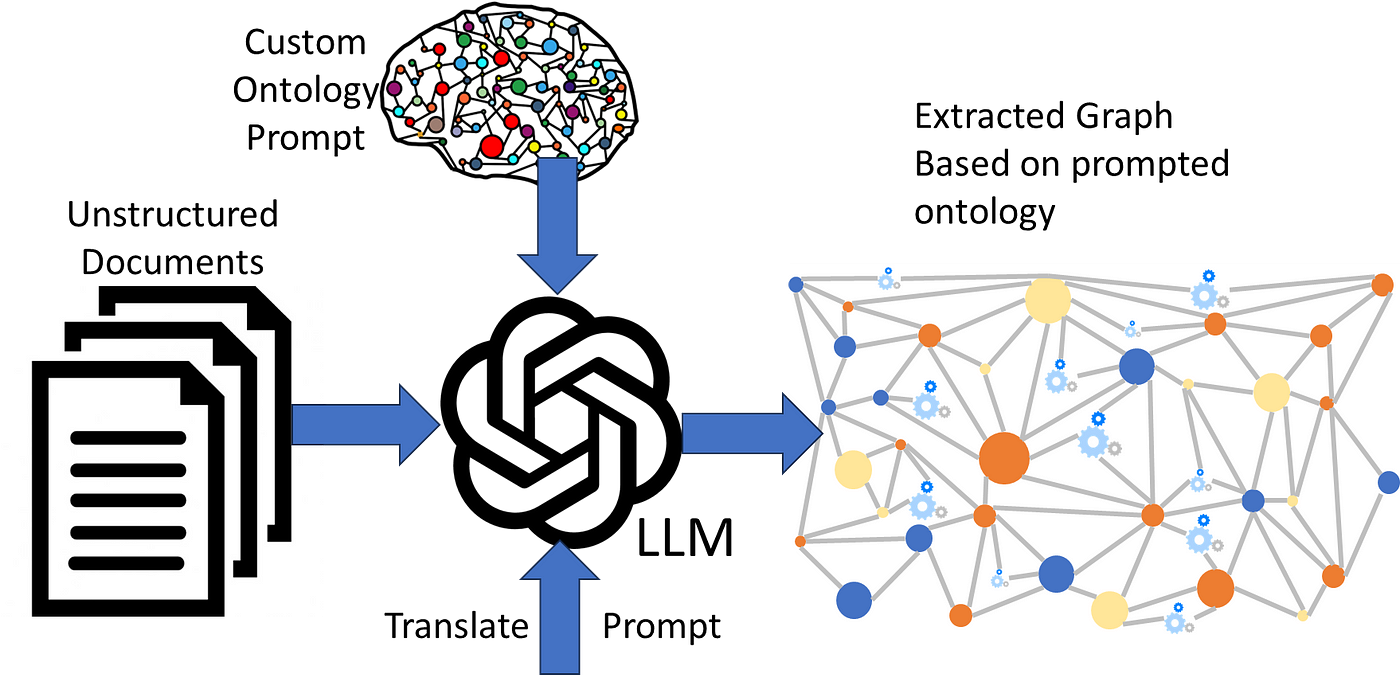

# HOW DOES IT WORK


## We first take some text from the internet, in this case two articles from the Guardian

In [1]:
import logging

from langchain.prompts import ChatPromptTemplate
import json
from langchain.document_loaders import TextLoader
from langchain.document_loaders import DirectoryLoader
from langchain.chains import create_extraction_chain
from langchain.chat_models import ChatOpenAI
import re

from dotenv import load_dotenv
import os

# Load environment variables from .env file
load_dotenv()
import instructor
from openai import OpenAI


aclient = instructor.patch(OpenAI())

from typing import Optional, List
from pydantic import BaseModel, Field


In [2]:
input_article_one = """ In the nicest possible way, Britons have always been a bit silly about animals. “Keeping pets, for the English, is not so much a leisure activity as it is an entire way of life,” wrote the anthropologist Kate Fox in Watching the English, nearly 20 years ago. Our dogs, in particular, have been an acceptable outlet for emotions and impulses we otherwise keep strictly controlled – our latent desire to be demonstratively affectionate, to be silly and chat to strangers. If this seems like an exaggeration, consider the different reactions you’d get if you struck up a conversation with someone in a park with a dog, versus someone on the train.

Indeed, British society has been set up to accommodate these four-legged ambassadors. In the UK – unlike Australia, say, or New Zealand – dogs are not just permitted on public transport but often openly encouraged. Many pubs and shops display waggish signs, reading, “Dogs welcome, people tolerated”, and have treat jars on their counters. The other day, as I was waiting outside a cafe with a friend’s dog, the barista urged me to bring her inside.

For years, Britons’ non-partisan passion for animals has been consistent amid dwindling common ground. But lately, rather than bringing out the best in us, our relationship with dogs is increasingly revealing us at our worst – and our supposed “best friends” are paying the price.

As with so many latent traits in the national psyche, it all came unleashed with the pandemic, when many people thought they might as well make the most of all that time at home and in local parks with a dog. Between 2019 and 2022, the number of pet dogs in the UK rose from about nine million to 13 million. But there’s long been a seasonal surge around this time of year, substantial enough for the Dogs Trust charity to coin its famous slogan back in 1978: “A dog is for life, not just for Christmas.”

Green spaces, meanwhile, have been steadily declining, and now many of us have returned to the office, just as those “pandemic dogs” are entering their troublesome teens. It’s a combustible combination and we are already seeing the results: the number of dog attacks recorded by police in England and Wales rose by more than a third between 2018 and 2022.

At the same time, sites such as Pets4Homes.co.uk are replete with listings for dogs that, their owners accept “with deep regret”, are no longer suited to their lifestyles now that lockdown is over. It may have felt as if it would go on for ever, but was there ever any suggestion it was going to last the average dog’s lifespan of a decade?

Living beings are being downgraded to mere commodities. You can see it reflected the “designer” breeds currently in fashion, the French bulldogs and pugs that look cute but spend their entire lives in discomfort. American XL bully dogs, now so controversial, are often sought after as a signifier of masculinity: roping an entire other life in service of our egos. Historically, many of Britain’s most popular breeds evolved to hunt vermin, retrieve game, herd, or otherwise do a specific job alongside humans; these days we are breeding and buying them for their aesthetic appeal.

Underpinning this is a shift to what was long disdained as the “American” approach: treating pets as substitutes for children. In the past in Britain, dogs were treasured on their own terms, for the qualities that made them dogs, and as such, sometimes better than people: their friendliness and trustingness and how they opened up the world for us. They were indulged, certainly – by allowing them on to the sofa or in our beds, for instance, when we’d sworn we never would – but in ways that did not negate or deny their essential otherness.

Now we have more dogs of such ludicrous proportions, they struggle to function as dogs at all – and we treat them accordingly, indulging them as we would ourselves: by buying unnecessary things. The total spend on pets in the UK has more than doubled in the past decade, reaching nearly £10bn last year. That huge rise has not just come from essentials: figures from the marketing agency Mintel suggest that one in five UK owners like their pet to “keep up with the latest trends” in grooming or, heaven forbid, outfits.

These days pet “boutiques” – like the one that recently opened on my street in Norwich, selling “cold-pressed” dog treats, “paw and nose balms” and spa services – are a widespread sign of gentrification. But it’s not just wealthier areas: this summer in Great Yarmouth, one of the most deprived towns in the country, I noticed seaside stalls selling not one but two brands of ice-cream for dogs.

It suggests dog-lovers have become untethered from their companions’ desires, let alone their needs. Let’s be honest: most dogs would be thrilled to bits to be eating a paper bag, or even their own faeces. And although they are certainly delighted by ice-cream, they don’t need it. But the ways we ourselves find solace – in consumption, by indulging our simian “treat brain” with things that we don’t need and/or aren’t good for us – we have simply extended to our pets.

It’s hard not to see the rise in dog-friendly restaurants, cinema screenings and even churches as similar to the ludicrous expenditure: a way to placate the two-legged being on the end of the lead (regardless of the experience of others in the vicinity).

Meanwhile, many dogs suffer daily deprivation, their worlds made small and monotonous by our busy modern schedules. These are social animals: it’s not natural for them to live without other dogs, let alone in an empty house for eight hours a day, Monday to Friday. If we are besieged by badly behaved dogs, the cause isn’t hard to pinpoint. Many behavioural problems can be alleviated and even addressed by sufficient exercise, supervision and consistent routines, but instead of organising our lives so that our pets may thrive, we show our love with a Halloween-themed cookie, or a new outfit for Instagram likes.

It’s easy to forget that we are sharing our homes with a descendant of the wolf when it is dressed in sheep’s clothing; but the more we learn about animals, the clearer it becomes that our treatment of them, simultaneously adoring and alienated, means they are leading strange, unsatisfying simulacra of the lives they ought to lead.

But for as long as we choose to share our lives with pets, the bar should be the same as for any relationship we value: being prepared to make sacrifices for their wellbeing, prioritising quality time and care, and loving them as they are – not for how they reflect on us, or how we’d like them to be.


"""

In [3]:
input_article_two = """Lee Parkin had been the proud owner of his terrier-spaniel cross Izzy for nearly 10 years when he stepped out for what would be his last walk with his beloved pet.

He was walking Izzy near his home in Doncaster when an XL bully pounced on her, mounting a 20-minute attack and ultimately killing the dog in front of Parkin, who desperately intervened in vain.

“It was such a nice day,” he said. “We were walking a normal field where I go, and I saw this dog loose. It appeared wild by its demeanour.”

Parkin, 50, took his dog through a gate but found himself cornered. The dog approached and started circling them. And then, he says, “it just grabbed her”.

“I’ve never encountered a bigger, stronger dog before in my life,” he says. “I’ve dealt with dogs attacking another dog before.”

Lee Parkin and his dog Izzy
Lee Parkin and his dog Izzy. Photograph: Lee Parkin
Parkin did his best to fight the dog off. “I smashed both hands against it, I twisted its balls, I kicked it in its back end. It did nothing whatsoever. I just shouted for help.”

At first there were no other people around, but “all of a sudden” there were about three other men, possibly including the owner, attempting to remove the animal.

A passerby gave him a lift to the vet but Izzy was “bleeding so profusely” he could hear her choking on her own blood. Her bones had been crushed.

The owners were handed a caution and the dog remains alive and living nearby.

“It was dangerously out of control,” Parkin says of the XL bully. “I’ve been brought up with dogs all my life. There’s no place for this type of dog in society.”

He welcomes the incoming ban on XL bullies but says he does not think it is enough and it will not work.

He believes the majority of XL bully owners will not be fazed by the ban and will keep their dogs and ignore the new law and regulations.

“The only effective thing that I’ve seen the police doing is turning up and shooting these dogs, which is what I think they should be doing,” Parkin adds.

He was left with significant mental impacts from the attack and was subsequently diagnosed with post-traumatic stress disorder. He received counselling but still struggles with walking dogs, and often rises very early in the morning to avoid other owners. He also carries a dog spray.

Marie Hay’s siberian husky, Naevia, survived a savage attack on the beach in Redcar on the North Yorkshire coast by two XL bullies – but has been left with life-changing injuries. Hay, like Parkin, has also been left with mental scars.

The owner of the dog that attacked seven-year-old Naevia is facing a criminal trial next year.

“We must have only been three minutes and the guy pulls up and basically he’s just got his dogs out of the car. They run down to the bottom of the beach and one starts to run towards Naevia.

“The owner turned to me and said: ‘They’re friendly, don’t worry,’ because I must have pulled a face at the size of the dog.

skip past newsletter promotion
Sign up to First Edition

Free daily newsletter
Our morning email breaks down the key stories of the day, telling you what’s happening and why it matters

Enter your email address
Sign up
Privacy Notice: Newsletters may contain info about charities, online ads, and content funded by outside parties. For more information see our Privacy Policy. We use Google reCaptcha to protect our website and the Google Privacy Policy and Terms of Service apply.
after newsletter promotion
“But then the first one jumped on Naevia’s chest and just started tearing into her.

“So she was screaming, screaming like a baby. And then the other one just came out of nowhere. The attack lasted about 12 minutes.”

An American bully XL with cropped ears. The practice is illegal in England and Wales, but it is still carried out by unscrupulous owners.
Perfect pets or dangerous dogs? The sudden, surprising rise of American bully XLs
Read more
Hay said several people attempted to remove the dogs but were initially unsuccessful. They attempted to lift the dogs by the legs and her 20-year-old daughter was bitten, as were other people who intervened.

The owner eventually placed a harness on one of them and put it in the car, while Hay had to walk the other dog back to the car on a lead.

Naevia lost 83% of her blood. “She was bleeding to death on the beach … she had hundreds of bite marks all over, she had an incision that ripped her chest open.

“She had to have between eight and 10 operations. She’s now in kidney failure because of the stress that it caused on her kidneys. She had to have two blood transfusions.”

Hay said the vet bills were more than £30,000, which she has been able to cover through donations on a fundraising website.

Like Parkin, Hay struggles to go out for walks now, due to the stress caused by the incident.

“I carry a full kit that I’ve made myself, it’s got a rape alarm, a couple of extra dog leads … I’m constantly in fear.”

Hay says she is “100%” supportive of the new ban. She says she accepts that a dog’s behaviour is partly down to the owners but is confident the breed plays a part too."""

## Our goal is to create a semantic representation of the data and split the data into a multilayer graph network containing propositions

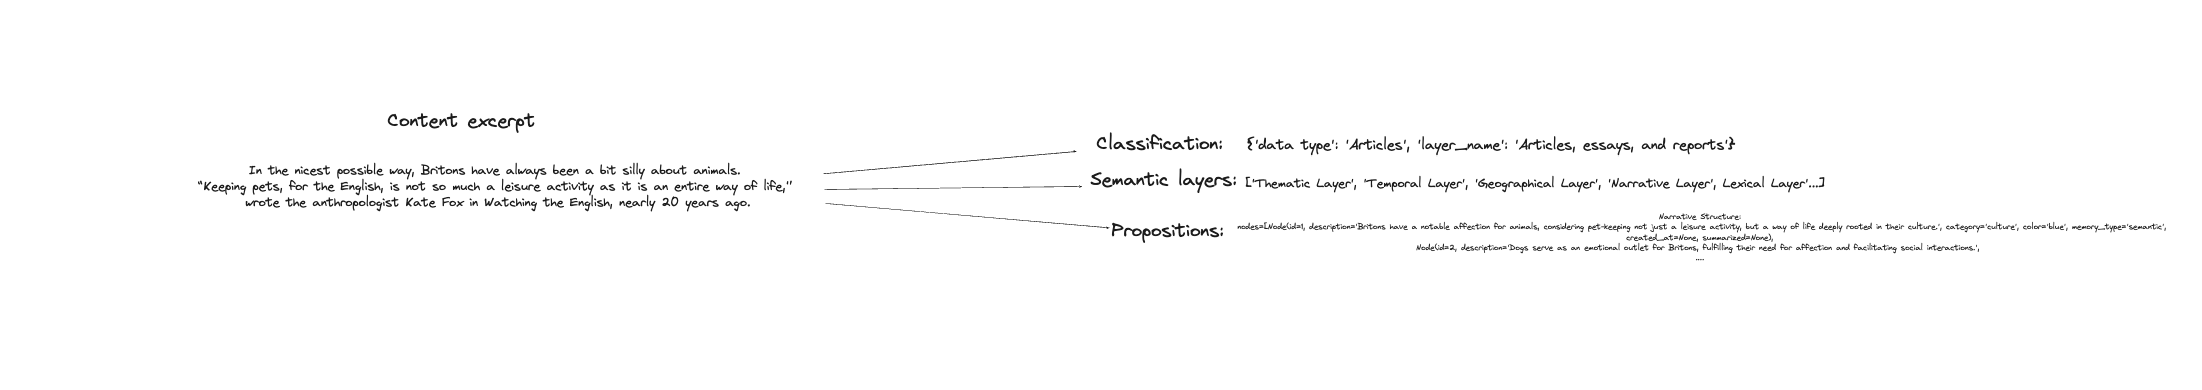

## What is a semantic layer and what are propositions

## Multilayer network is cognitive multilayer networks as a  quantitative and interpretative framework for investigating the mental lexicon. The mental lexicon is a complex cognitive system representing information about the words/concepts that one knows
Article 2

## A proposition is: Propositions are defined as atomic expressions within text, each encapsulating a distinct factoid and presented in a concise, self-contained natural language format.
Article 1

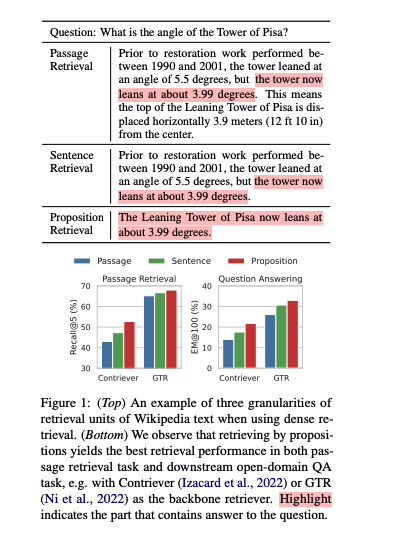 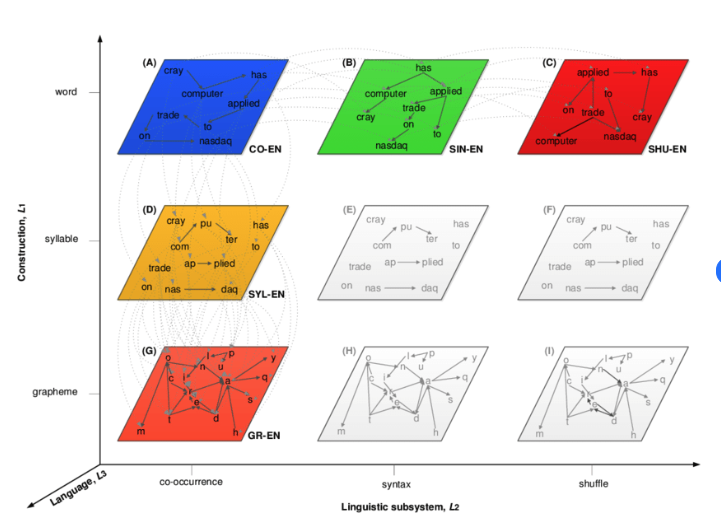

## We combine the concepts of Multilayer networks with the propositions to create a semantic knowledge graph

Relevant articles are: https://arxiv.org/pdf/2312.06648.pdf and   https://link.springer.com/article/10.3758/s13423-024-02473-9

## We start using Cognee by getting the prepared data and understanding what type of data it is, using LLMs

In [4]:
import os

In [27]:
from cognitive_architecture.modules.cognify.llm.classify_content import classify_into_categories
from cognitive_architecture.modules.cognify.llm.content_to_cog_layers import content_to_cog_layers
from cognitive_architecture.modules.cognify.llm.content_to_propositions import generate_graph
from cognitive_architecture.shared.data_models import ContentPrediction,  KnowledgeGraph, CognitiveLayer

In [6]:
required_layers_one = await classify_into_categories(input_article_one, "classify_content.txt", ContentPrediction)

In [7]:
print(required_layers_one.dict())

{'label': {'type': 'TEXT', 'subclass': [<TextSubclass.ARTICLES: 'Articles, essays, and reports'>]}}


In [8]:
#note that you can provide your own Pydantic model that would represent your own categorisation
required_layers_two = await classify_into_categories(input_article_two, "classify_content.txt", ContentPrediction)

In [9]:
print(required_layers_two.dict())

{'label': {'type': 'TEXT', 'subclass': [<TextSubclass.PERSONAL_NARRATIVES: 'Personal narratives and stories'>]}}


## Now that we have content categories, it is time to provide them to our graph generation prompt

The goal of this section is to make sure that we can turn our information into a set of relevant cognitive layers.
Layers can be anything like "word", or "sentence" to some categories like "movies" or "fruits" 
In this case, we let the LLM decide what the appropriate layers are.

In [11]:
def transform_dict(original):
    # Extract the first subclass from the list (assuming there could be more)
    subclass_enum = original['label']['subclass'][0]

    # The data type is derived from 'type' and converted to lowercase
    data_type = original['label']['type'].lower()
    
    # The context name is the name of the Enum member (e.g., 'NEWS_STORIES')
    context_name = subclass_enum.name.replace('_', ' ').title()
    
    # The layer name is the value of the Enum member (e.g., 'News stories and blog posts')
    layer_name = subclass_enum.value

    # Construct the new dictionary
    new_dict = {
        'data_type': data_type,
        'context_name': context_name,
        'layer_name': layer_name
    }

    return new_dict

# Transform the original dictionary
transformed_dict_1 = transform_dict(required_layers_one.dict())
transformed_dict_2 = transform_dict(required_layers_two.dict())



In [12]:
cognitive_layers_one = await content_to_cog_layers("generate_cog_layers.txt", transformed_dict_1, response_model=CognitiveLayer)

You are tasked with analyzing `text` files, especially in a multilayer network context for tasks such as analysis, categorization, and feature extraction. Various layers can be incorporated to capture the depth and breadth of information contained within the text.

These layers can help in understanding the content, context, and characteristics of the `text`.

Your objective is to extract meaningful layers of information that will contribute to constructing a detailed multilayer network or knowledge graph.

Approach this task by considering the unique characteristics and inherent properties of the data at hand.

VERY IMPORTANT: The context you are working in is `Articles, essays, and reports` and the specific domain you are extracting data on is `Articles, essays, and reports`.

Guidelines for Layer Extraction:
Take into account: The content type, in this case, is: `Articles, essays, and reports`, should play a major role in how you decompose into layers.

Based on your analysis, defin

In [13]:
cognitive_layers_two = await content_to_cog_layers("generate_cog_layers.txt", transformed_dict_2, response_model=CognitiveLayer)

You are tasked with analyzing `text` files, especially in a multilayer network context for tasks such as analysis, categorization, and feature extraction. Various layers can be incorporated to capture the depth and breadth of information contained within the text.

These layers can help in understanding the content, context, and characteristics of the `text`.

Your objective is to extract meaningful layers of information that will contribute to constructing a detailed multilayer network or knowledge graph.

Approach this task by considering the unique characteristics and inherent properties of the data at hand.

VERY IMPORTANT: The context you are working in is `Personal narratives and stories` and the specific domain you are extracting data on is `Personal narratives and stories`.

Guidelines for Layer Extraction:
Take into account: The content type, in this case, is: `Personal narratives and stories`, should play a major role in how you decompose into layers.

Based on your analysis,

In [14]:
cognitive_layers_one = [layer_subgroup.name for layer_subgroup in cognitive_layers_one.cognitive_layers]

print("Extracted Layer Names:", cognitive_layers_one)

Extracted Layer Names: ['Structural Layer', 'Semantic Layer', 'Referential Layer', 'Lexical Layer', 'Narrative Layer', 'Contextual Layer', 'Intertextual Layer', 'Visual Layer', 'Interactional Layer', 'Statistical Layer']


In [15]:
cognitive_layers_two = [layer_subgroup.name for layer_subgroup in cognitive_layers_two.cognitive_layers]

print("Extracted Layer Names:", cognitive_layers_two)

Extracted Layer Names: ['Narrative Structure', 'Character Identification', 'Emotional Trajectories', 'Thematic Elements', 'Cultural and Social Context', 'Temporal Aspects', 'Language and Style', 'Interpersonal Dynamics', 'Symbolism and Metaphors', 'Intertextuality']


In [16]:
# Now we decompose each layer into a relevant graph that extracts information from the text and focuses on exactly that semantic aspect of the text

In [28]:
import nest_asyncio
nest_asyncio.apply()
import asyncio
from typing import List, Type

# Assuming generate_graph, KnowledgeGraph, and other necessary components are defined elsewhere

async def generate_graphs_for_all_layers(text_input: str, layers: List[str], response_model: Type[BaseModel]):
    tasks = [generate_graph(text_input, "generate_graph_prompt.txt", {'layer': layer}, response_model) for layer in layers]
    return await asyncio.gather(*tasks)

# Execute the async function and print results for each set of layers
async def async_graph_per_layer(text_input: str, cognitive_layers: List[str]):
    graphs = await generate_graphs_for_all_layers(text_input, cognitive_layers, KnowledgeGraph)
    # for layer, graph in zip(cognitive_layers, graphs):
    #     print(f"{layer}: {graph}")
    return graphs
        

# Run the async function for each set of cognitive layers
layer_1_graph = await async_graph_per_layer(input_article_one, cognitive_layers_one)
layer_2_graph = await async_graph_per_layer(input_article_one, cognitive_layers_two)


You are a top-tier algorithm
designed for extracting information in structured formats to build a knowledge graph.
- **Nodes** represent entities and concepts. They're akin to Wikipedia nodes.
- **Edges** represent relationships between concepts. They're akin to Wikipedia links.
- The aim is to achieve simplicity and clarity in the
knowledge graph, making it accessible for a vast audience.
YOU ARE ONLY EXTRACTING DATA FOR COGNITIVE LAYER `Structural Layer`
## 2. Labeling Nodes
- **Consistency**: Ensure you use basic or elementary types for node labels.
  - For example, when you identify an entity representing a person,
   always label it as **"person"**.
  Avoid using more specific terms like "mathematician" or "scientist".
  - Include event, entity, time, or action nodes to the category.
  - Classify the memory type as episodic or semantic.
- **Node IDs**: Never utilize integers as node IDs.
    Node IDs should be names or human-readable identifiers found in the text.
## 3. Handling N

In [23]:
# import networkx as nx
# import uuid
# from datetime import datetime

# def create_user_content_graph(user_id, custom_user_properties=None, required_layers=None, default_fields=None, existing_graph=None):

#     category_name = required_layers.dict()['name']
#     subgroup_names = [subgroup['name'] for subgroup in required_layers.dict()['cognitive_subgroups']]

    
#     # Construct the additional_categories structure
#     additional_categories = {
#         category_name: subgroup_names
# }

#     # Define default fields for all nodes if not provided
#     if default_fields is None:
#         default_fields = {
#             'created_at': datetime.now().strftime("%Y-%m-%d %H:%M:%S"),
#             'updated_at': datetime.now().strftime("%Y-%m-%d %H:%M:%S")
#         }

#     # Merge custom user properties with default properties; custom properties take precedence
#     user_properties = {**default_fields, **(custom_user_properties or {})}

#     # Default content categories
#     content_categories = {
#         "Temporal": ["Historical events", "Schedules and timelines"],
#         "Positional": ["Geographical locations", "Spatial data"],
#         "Propositions": ["Hypotheses and theories", "Claims and arguments"],
#         "Personalization": ["User preferences", "User information"]
#     }

#     # Update content categories with any additional categories provided
#     if additional_categories:
#         content_categories.update(additional_categories)

#     G = existing_graph if existing_graph else nx.MultiDiGraph()

#     # Check if the user node already exists, if not, add the user node with properties
#     if not G.has_node(user_id):
#         G.add_node(user_id, **user_properties)

#     # Add or update content category nodes and their edges
#     for category, subclasses in content_categories.items():
#         category_properties = {**default_fields, 'type': 'category'}

#         # Add or update the category node
#         if not G.has_node(category):
#             G.add_node(category, **category_properties)
#             G.add_edge(user_id, category, relationship='created')

#         # Add or update subclass nodes and their edges
#         for subclass in subclasses:
#             # Using both category and subclass names to ensure uniqueness within categories
#             subclass_node_id = f"{category}:{subclass}"

#             # Check if subclass node exists before adding, based on node content
#             if not any(subclass == data.get('content') for _, data in G.nodes(data=True)):
#                 subclass_properties = {**default_fields, 'type': 'subclass', 'content': subclass}
#                 G.add_node(subclass_node_id, **subclass_properties)
#                 G.add_edge(category, subclass_node_id, relationship='includes')

#     return G

#     # # Add content category nodes and their edges
#     # for category, subclasses in content_categories.items():
#     #     category_properties = {**default_fields, 'type': 'category'}
#     #     G.add_node(category, **category_properties)
#     #     G.add_edge(user_id, category, relationship='created')

#     #     # Add subclass nodes and their edges
#     #     for subclass in subclasses:
#     #         unique_id = str(uuid.uuid4())
#     #         subclass_node_id = f"{subclass} - {unique_id}"
#     #         subclass_properties = {**default_fields, 'type': 'subclass', 'content': subclass}
#     #         G.add_node(subclass_node_id, **subclass_properties)
#     #         G.add_edge(category, subclass_node_id, relationship='includes')

#     # return G



In [264]:
# G = None

In [24]:
# Example usage
user_id = 'user123'
custom_user_properties = {
    'username': 'exampleUser',
    'email': 'user@example.com'
}

# additional_categories = {
#     "Natural Language Text": ["Articles, essays, and reports", "Books and manuscripts"]
# }

G = create_user_content_graph(user_id, custom_user_properties, required_layers_one)

# Accessing the graph
print("Nodes in the graph:")
print(G.nodes(data=True))
print("\nEdges in the graph:")
print(G.edges(data=True))

Nodes in the graph:
[('user123', {'created_at': '2024-03-04 20:16:14', 'updated_at': '2024-03-04 20:16:14', 'username': 'exampleUser', 'email': 'user@example.com'}), ('Temporal', {'created_at': '2024-03-04 20:16:14', 'updated_at': '2024-03-04 20:16:14', 'type': 'category'}), ('Temporal:Historical events', {'created_at': '2024-03-04 20:16:14', 'updated_at': '2024-03-04 20:16:14', 'type': 'subclass', 'content': 'Historical events'}), ('Temporal:Schedules and timelines', {'created_at': '2024-03-04 20:16:14', 'updated_at': '2024-03-04 20:16:14', 'type': 'subclass', 'content': 'Schedules and timelines'}), ('Positional', {'created_at': '2024-03-04 20:16:14', 'updated_at': '2024-03-04 20:16:14', 'type': 'category'}), ('Positional:Geographical locations', {'created_at': '2024-03-04 20:16:14', 'updated_at': '2024-03-04 20:16:14', 'type': 'subclass', 'content': 'Geographical locations'}), ('Positional:Spatial data', {'created_at': '2024-03-04 20:16:14', 'updated_at': '2024-03-04 20:16:14', 'type

In [25]:
required_layers_one

CognitiveCategory(name='Natural Language Text', cognitive_subgroups=[CognitiveLayerSubgroup(id=1, name='Articles, essays, and reports', data_type='TEXT')])

In [26]:
B = create_user_content_graph(user_id, custom_user_properties, required_layers_two, existing_graph=G)

In [269]:
print(B)

MultiDiGraph with 16 nodes and 15 edges


In [28]:
import graphistry
import pandas as pd

# Assuming Graphistry is already configured with API key
# graphistry.register(api=3, username='your_username', password='your_password')

# Convert NetworkX graph to a Pandas DataFrame
edges = nx.to_pandas_edgelist(B)
graphistry.register(api=3, username='Vasilije1990', password='Q@HLdgv5SMUsGxy') 

# Visualize the graph
graphistry.edges(edges, 'source', 'target').plot()

In [ ]:
print(G)

In [29]:
def append_data_to_graph(G, category_name, subclass_content, new_data, layer_uuid, layer_decomposition_uuid):
    # Find the node ID for the subclass within the category
    subclass_node_id = None
    for node, data in G.nodes(data=True):
        if subclass_content in node:
            subclass_node_id = node

            print(subclass_node_id)

    if not subclass_node_id:
        print(f"Subclass '{subclass_content}' under category '{category_name}' not found in the graph.")
        return G

    # Mapping from old node IDs to new node IDs
    node_id_mapping = {}

    # Add nodes from the Pydantic object
    for node in new_data.nodes:
        unique_node_id =uuid.uuid4()
        new_node_id = f"{node.description} - {str(layer_uuid)}  - {str(layer_decomposition_uuid)} - {str(unique_node_id)}"
        G.add_node(new_node_id, 
                   created_at=datetime.now().strftime("%Y-%m-%d %H:%M:%S"), 
                   updated_at=datetime.now().strftime("%Y-%m-%d %H:%M:%S"), 
                   description=node.description, 
                   category=node.category, 
                   memory_type=node.memory_type, 
                   layer_uuid = str(layer_uuid),
                   layer_decomposition_uuid = str(layer_decomposition_uuid),
                   id = str(unique_node_id),
                   type='detail')
        G.add_edge(subclass_node_id, new_node_id, relationship='detail')

        # Store the mapping from old node ID to new node ID
        node_id_mapping[node.id] = new_node_id

    # Add edges from the Pydantic object using the new node IDs
    for edge in new_data.edges:
        # Use the mapping to get the new node IDs
        source_node_id = node_id_mapping.get(edge.source)
        target_node_id = node_id_mapping.get(edge.target)

        if source_node_id and target_node_id:
            G.add_edge(source_node_id, target_node_id, description=edge.description, relationship='relation')
        else:
            print(f"Could not find mapping for edge from {edge.source} to {edge.target}")

    return G




# Assuming `pydata` is your Pydantic model instance containing the nodes and edges information
# and `G` is your existing graph

# # Here's how you would call this function:
# category_name = list(additional_categories.keys())[0]
# subclass_content = list(additional_categories.values())[0][0]


In [30]:
required_layers_one

CognitiveCategory(name='Natural Language Text', cognitive_subgroups=[CognitiveLayerSubgroup(id=1, name='Articles, essays, and reports', data_type='TEXT')])

In [31]:
def append_to_graph(layer_graphs, required_layers, G):
    layer_uuid = uuid.uuid4()
    category_name = required_layers.dict()['name']
    subgroup_names = [subgroup['name'] for subgroup in required_layers.dict()['cognitive_subgroups']]
    for subgroup in subgroup_names:

        for layer_decomposition in layer_graphs:
            layer_decomposition_uuid = uuid.uuid4()
            F = append_data_to_graph(G, category_name[0], subgroup, layer_decomposition, layer_uuid, layer_decomposition_uuid)
            
            # Print updated graph for verification
            print("Updated Nodes:", F)
    return F


In [32]:

U = append_to_graph(layer_1_graph, required_layers_one, G)

Natural Language Text:Articles, essays, and reports
Updated Nodes: MultiDiGraph with 24 nodes and 30 edges
Natural Language Text:Articles, essays, and reports
Updated Nodes: MultiDiGraph with 31 nodes and 42 edges
Natural Language Text:Articles, essays, and reports
Updated Nodes: MultiDiGraph with 44 nodes and 64 edges


In [33]:
R = append_to_graph(layer_2_graph, required_layers_two, U)

Natural Language Text:News stories and blog posts
Updated Nodes: MultiDiGraph with 53 nodes and 84 edges
Natural Language Text:News stories and blog posts
Updated Nodes: MultiDiGraph with 58 nodes and 93 edges
Natural Language Text:News stories and blog posts
Updated Nodes: MultiDiGraph with 65 nodes and 103 edges
Natural Language Text:Personal narratives and stories
Updated Nodes: MultiDiGraph with 74 nodes and 123 edges
Natural Language Text:Personal narratives and stories
Updated Nodes: MultiDiGraph with 79 nodes and 132 edges
Natural Language Text:Personal narratives and stories
Updated Nodes: MultiDiGraph with 86 nodes and 142 edges


In [434]:
import graphistry
import pandas as pd

# Assuming Graphistry is already configured with API key
# graphistry.register(api=3, username='your_username', password='your_password')

# Convert NetworkX graph to a Pandas DataFrame
edges = nx.to_pandas_edgelist(R)
graphistry.register(api=3, username='Vasilije1990', password='Q@HLdgv5SMUsGxy') 

# Visualize the graph
graphistry.edges(edges, 'source', 'target').plot()

In [315]:
# print(R.nodes(data=True))

In [ ]:
## Utility to check if relationships are as they should be

In [36]:
def list_graph_relationships_with_node_attributes(graph):
    print("Graph Relationships with Node Attributes:")
    for source, target, data in graph.edges(data=True):
        # Get source and target node attributes
        source_attrs = graph.nodes[source]
        target_attrs = graph.nodes[target]
        relationship = data.get('relationship', 'No relationship specified')

        # Format and print source and target node attributes along with the relationship
        source_attrs_formatted = ', '.join([f"{k}: {v}" for k, v in source_attrs.items()])
        target_attrs_formatted = ', '.join([f"{k}: {v}" for k, v in target_attrs.items()])
        
        print(f"Source [{source_attrs_formatted}] -> Target [{target_attrs_formatted}]: Relationship [{relationship}]")

# Assuming 'F' is your graph instance
list_graph_relationships_with_node_attributes(G)

Graph Relationships with Node Attributes:
Source [created_at: 2024-03-04 20:16:14, updated_at: 2024-03-04 20:16:14, username: exampleUser, email: user@example.com] -> Target [created_at: 2024-03-04 20:16:14, updated_at: 2024-03-04 20:16:14, type: category]: Relationship [created]
Source [created_at: 2024-03-04 20:16:14, updated_at: 2024-03-04 20:16:14, username: exampleUser, email: user@example.com] -> Target [created_at: 2024-03-04 20:16:14, updated_at: 2024-03-04 20:16:14, type: category]: Relationship [created]
Source [created_at: 2024-03-04 20:16:14, updated_at: 2024-03-04 20:16:14, username: exampleUser, email: user@example.com] -> Target [created_at: 2024-03-04 20:16:14, updated_at: 2024-03-04 20:16:14, type: category]: Relationship [created]
Source [created_at: 2024-03-04 20:16:14, updated_at: 2024-03-04 20:16:14, username: exampleUser, email: user@example.com] -> Target [created_at: 2024-03-04 20:16:14, updated_at: 2024-03-04 20:16:14, type: category]: Relationship [created]
So

In [2]:
!pip install qdrant-client

  Using cached qdrant_client-1.7.3-py3-none-any.whl.metadata (9.3 kB)
  Using cached portalocker-2.8.2-py3-none-any.whl.metadata (8.5 kB)
  Using cached h2-4.1.0-py3-none-any.whl.metadata (3.6 kB)
  Using cached hyperframe-6.0.1-py3-none-any.whl.metadata (2.7 kB)
  Using cached hpack-4.0.0-py3-none-any.whl (32 kB)
Using cached qdrant_client-1.7.3-py3-none-any.whl (206 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 19.6 MB/s eta 0:00:0000:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 21.1 MB/s eta 0:00:0000:0100:01
Using cached portalocker-2.8.2-py3-none-any.whl (17 kB)
Using cached h2-4.1.0-py3-none-any.whl (57 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 394.2/394.2 kB 13.4 MB/s eta 0:00:00
Using cached hyperframe-6.0.1-py3-none-any.whl (12 kB)

[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [294]:
# def extract_node_descriptions(data):
#     descriptions = []
#     for node_id, attributes in data:
#         # Check if both 'description' and 'layer_id' are in the attributes
#         if 'description' in attributes and 'layer_id' in attributes and 'layer_uuid' in attributes:
#             descriptions.append({
#                 'node_id': node_id, 
#                 'description': attributes['description'],
#                 'layer_uuid': attributes['layer_uuid']  # Include layer_id
#             })
#     return descriptions

# # Extract the node descriptions
# node_descriptions = extract_node_descriptions(R.nodes(data=True))

# # Display the results (displaying a subset for brevity)
# for item in node_descriptions[:5]:  # Adjust the slice as needed for display
#     print(item)

In [303]:
# descriptions = []
# for node_id, attributes in R.nodes(data=True):
#     if 'description' in attributes:
#         descriptions.append({'node_id': node_id, 'description': attributes['description'], 'layer_uuid': attributes['layer_uuid'], 'layer_decomposition_uuid': attributes['layer_decomposition_uuid']})


In [37]:
def extract_node_descriptions(data):
    descriptions = []
    for node_id, attributes in data:
        if 'description' in attributes:
            descriptions.append({'node_id': attributes['id'], 'description': attributes['description'], 'layer_uuid': attributes['layer_uuid'], 'layer_decomposition_uuid': attributes['layer_decomposition_uuid'] })
    return descriptions

# Extract the node descriptions
node_descriptions = extract_node_descriptions(R.nodes(data=True))

# Display the results (displaying a subset for brevity)
for item in node_descriptions[:5]:  # Adjust the slice as needed for display
    print(item)

{'node_id': 'd443269f-44ff-4c10-ab4a-fab9ead0f904', 'description': 'For Britons, keeping pets is an entire way of life.', 'layer_uuid': '66009783-f985-47e5-9553-d60573e7cc33', 'layer_decomposition_uuid': '67200cb4-16fc-40f9-b231-c9e720aeb14a'}
{'node_id': '2d588b35-062e-44e7-bbb2-1642ba0411e3', 'description': 'Pets, especially dogs, serve as outlets for emotions and social interaction within controlled social norms.', 'layer_uuid': '66009783-f985-47e5-9553-d60573e7cc33', 'layer_decomposition_uuid': '67200cb4-16fc-40f9-b231-c9e720aeb14a'}
{'node_id': '6a34c9bd-0dee-4db0-8258-86d2dd87303d', 'description': 'Dogs are encouraged and welcomed in public spaces such as pubs, shops, and public transport.', 'layer_uuid': '66009783-f985-47e5-9553-d60573e7cc33', 'layer_decomposition_uuid': '67200cb4-16fc-40f9-b231-c9e720aeb14a'}
{'node_id': '630b58dd-65f6-4d55-b3fc-67b59d696b4c', 'description': 'The rise in pet ownership and the desire for designer breeds can lead to negative outcomes for animal w

## HOW TO CONNECT INTERLAYERS WITH SEMANTIC SEARCH

In [295]:
## Idea here is to pass descriptions to the vectorstore and embed them, then do a semantic search for each description to other one and retrieve only those between layers that have a connection
## We load each layer as a qdrant collection and then search the terms in other collection to establish links between layers, after that is done, we save the relevant IDs and create connections in the graph

In [187]:
from openai import OpenAI
client = OpenAI()

In [225]:
from openai import AsyncOpenAI
client = AsyncOpenAI()

In [238]:
def get_embedding_b(text):
    client = OpenAI()
    response = client.embeddings.create(
        input=[text],
        model="text-embedding-3-large"  # Choose an appropriate engine for your use case
    ).data[0].embedding

    return response

In [4]:
import asyncio
from cognitive_architecture.openai_tools import async_get_embedding_with_backoff
# Ensure your async function is defined in a cell above or within this cell

# async def run_async_function(text):
#     text = "Your input text here"
#     model = "text-embedding-ada-002"  # Or any other model you wish to use
#     embedding = await async_get_embedding_with_backoff(text, model)
#     print(embedding)

# Use asyncio.run() to run the async function
loop = asyncio.get_event_loop()

# Create and add the task to the event loop
# Replace 'your_text_here' with the actual text you want to process
task = loop.create_task(async_get_embedding_with_backoff('your_text_here'))

ModuleNotFoundError: No module named 'cognitive_architecture.openai_tools'

In [ ]:
!pip install nest_asyncio


In [227]:

import asyncio
import nest_asyncio

# Apply nest_asyncio to the current event loop
nest_asyncio.apply()

# Your async function and the list of texts remain the same
texts = ["Text 1", "Text 2", "Text 3"]  # Example list of texts

async def get_embeddings(texts):
    tasks = [async_get_embedding_with_backoff(text,"text-embedding-3-large") for text in texts]
    results = await asyncio.gather(*tasks)
    return results

# # Now you can run your async function directly using await in the notebook cell
# embeddings = await get_embeddings(texts)

In [66]:
# embedding = get_embedding("Example text to encode")

In [67]:
# some_embeddings = []
# some_text = ["bla", "blwea"]
# for st in some_text:
#     some_embeddings.append(get_embedding(st))

In [228]:
from qdrant_client import models, QdrantClient

In [229]:
qdrant = QdrantClient(":memory:")

In [230]:
from qdrant_client.http import models as rest

In [441]:
# unique_layer_uuids

In [231]:

unique_layer_uuids = set(node['layer_decomposition_uuid'] for node in node_descriptions)
# Create a new collection in Qdrant
def create_collection(collection_name):
    qdrant.recreate_collection(
        collection_name=collection_name,
        vectors_config={
            'content': rest.VectorParams(
                distance=rest.Distance.COSINE,
                size=3072,
            )
        }
    )
for layer in unique_layer_uuids:
    create_collection(layer)

In [440]:
# for item in node_descriptions[:5]:  # Adjust the slice as needed for display
#     print(item)
#     print(item['description'])

In [233]:
# collection_schema = qdrant.get_collection(collection_name="97597864-a11a-4058-b854-8f21864c7e06")

# # Print the schema to inspect it
# print(collection_schema)

In [234]:
# collection_name = 'Articles'

# # Create a new collection in Qdrant
# def create_collection(collection_name):
#     qdrant.recreate_collection(
#         collection_name=collection_name,
#         vectors_config={
#             'content': rest.VectorParams(
#                 distance=rest.Distance.COSINE,
#                 size=3072,
#             )
#         }
#     )

# Function to upload embeddings to Qdrant
# def upload_embedding(id, metadata, some_embeddings, collection_name):
#     qdrant.upload_points(
#         collection_name=collection_name,
#         points=[
#             models.PointStruct(
#                 id=idx, vector={"content":doc}, payload=metadata
#             )
#             for idx, doc in enumerate(some_embeddings)
#         ],
#     )

# # Example usage
# upload_embedding(1, ("meta":1}, some_embeddings, collection_name)

In [235]:
async def upload_embedding(id, metadata, some_embeddings, collection_name):
    print(id)
    # if some_embeddings and isinstance(some_embeddings[0], list):
    #     some_embeddings = [item for sublist in some_embeddings for item in sublist]
    
    qdrant.upload_points(
        collection_name=collection_name,
        points=[
            models.PointStruct(
                id=id, vector={"content":some_embeddings}, payload=metadata
            )
        ]
        ,
    )

In [88]:
async def upload_embeddings(node_descriptions):
    tasks = []

    for item in node_descriptions:  
        try:
            embedding = await get_embeddings(item['description'])
            # Ensure embedding is not empty and is properly structured
            # if embedding and all(isinstance(e, float) for sublist in embedding for e in (sublist if isinstance(sublist, list) else [sublist])):
            #     # Flatten embedding if it's a list of lists
            #     if isinstance(embedding[0], list):
            #         embedding = [e for sublist in embedding for e in sublist]
            #     print(f"Uploading embedding for node_id {item['node_id']} with length {len(embedding)}")

                # Create and append the upload task
                task = asyncio.create_task(upload_embedding(
                    id=item['node_id'],
                    metadata={"meta": item['description']},
                    some_embeddings=embedding,
                    collection_name=item['layer_decomposition_uuid']
                ))
                tasks.append(task)
            else:
                print(f"Skipping upload for node_id {item['node_id']} due to incorrect embedding format or empty embedding.")
        except Exception as e:
            print(f"Error processing embedding for node_id {item['node_id']}: {e}")

    # Wait for all upload tasks to complete, if any
    if tasks:
        await asyncio.gather(*tasks)
    else:
        print("No valid embeddings to upload.")

In [438]:
# unique_layer_uuids

In [439]:
# node_descriptions[:2]

In [281]:
for item in node_descriptions: 
    print(item['node_id'])
    await upload_embedding(id = item['node_id'], metadata = {"meta":item['description']}, some_embeddings = get_embedding_b(item['description']), collection_name= item['layer_decomposition_uuid'])

d443269f-44ff-4c10-ab4a-fab9ead0f904
d443269f-44ff-4c10-ab4a-fab9ead0f904
2d588b35-062e-44e7-bbb2-1642ba0411e3
2d588b35-062e-44e7-bbb2-1642ba0411e3
6a34c9bd-0dee-4db0-8258-86d2dd87303d
6a34c9bd-0dee-4db0-8258-86d2dd87303d
630b58dd-65f6-4d55-b3fc-67b59d696b4c
630b58dd-65f6-4d55-b3fc-67b59d696b4c
54db7b9e-5f2f-4287-9185-7214eb8f0ccd
54db7b9e-5f2f-4287-9185-7214eb8f0ccd
53b9fc97-7c9e-46f1-ab2c-741405fa12ac
53b9fc97-7c9e-46f1-ab2c-741405fa12ac
e221c461-f9c1-4d99-9ae5-25299b6e0516
e221c461-f9c1-4d99-9ae5-25299b6e0516
9dce0831-6e87-4fd9-93ba-e6944b22929b
9dce0831-6e87-4fd9-93ba-e6944b22929b
f800260d-6de1-4a5f-a501-f5d58f3258c3
f800260d-6de1-4a5f-a501-f5d58f3258c3
d4beb707-c19e-45fc-8fa9-387e4410282f
d4beb707-c19e-45fc-8fa9-387e4410282f
2f3e9b5f-17bf-4346-9cfc-104fdd467ff9
2f3e9b5f-17bf-4346-9cfc-104fdd467ff9
a75bae98-0748-4c4d-b807-5d3e19a9d638
a75bae98-0748-4c4d-b807-5d3e19a9d638
446383f7-ebbd-4ca1-891f-f0294bb11782
446383f7-ebbd-4ca1-891f-f0294bb11782
28368449-6e7a-4dd5-89fb-7dac13995c63
2

In [220]:
# import nest_asyncio

# # Apply nest_asyncio to the current event loop
# nest_asyncio.apply()

# await upload_embeddings(node_descriptions)

In [ ]:
# for item in node_descriptions[:5]: 
#     print(item['node_id'])
#     upload_embedding(id = item['node_id'], metadata = {"meta":item['description']}, some_embeddings = get_embedding(item['description']), collection_name= item['layer_decomposition_uuid'])

In [240]:
grouped_data = {}

# Iterate through each dictionary in the list
for item in node_descriptions:
    # Get the layer_decomposition_uuid of the current dictionary
    uuid = item['layer_decomposition_uuid']
    
    # Check if this uuid is already a key in the grouped_data dictionary
    if uuid not in grouped_data:
        # If not, initialize a new list for this uuid
        grouped_data[uuid] = []
    
    # Append the current dictionary to the list corresponding to its uuid
    grouped_data[uuid].append(item)

In [348]:
# grouped_data

In [282]:
# def qdrant_search (collection_name, embedding):
#     hits = qdrant.search(
#     collection_name=collection_name,
#     query_vector=(
#             "content", embedding
#         ),
#     limit=3,
# )
#     return hits
    

In [283]:
# for cl, e in relationship_dict:
#     print(cl)
#     print(e)
#     g = qdrant_search(cl, e)
#     print(g)

In [284]:
# qdrant_search ('67200cb4-16fc-40f9-b231-c9e720aeb14a',get_embedding_b("Britons"))

[ScoredPoint(id='d443269f-44ff-4c10-ab4a-fab9ead0f904', version=0, score=0.4133083905881839, payload={'meta': 'For Britons, keeping pets is an entire way of life.'}, vector=None, shard_key=None),
 ScoredPoint(id='6a34c9bd-0dee-4db0-8258-86d2dd87303d', version=0, score=0.17809770074247908, payload={'meta': 'Dogs are encouraged and welcomed in public spaces such as pubs, shops, and public transport.'}, vector=None, shard_key=None),
 ScoredPoint(id='53b9fc97-7c9e-46f1-ab2c-741405fa12ac', version=0, score=0.1524232010928769, payload={'meta': "Ownership of certain dog breeds is seen as a status symbol and a reflection of owner's identity."}, vector=None, shard_key=None)]

In [307]:
async def qdrant_batch_search(collection_name: str, embeddings: List[List[float]], limits: List[int], with_vectors: List[bool] = None):
    """
    Perform batch search in a Qdrant collection with dynamic search requests.

    Args:
    - collection_name (str): Name of the collection to search in.
    - embeddings (List[List[float]]): List of embeddings to search for.
    - limits (List[int]): List of result limits for each search request.
    - with_vectors (List[bool], optional): List indicating whether to return vectors for each search request.
        Defaults to None, in which case vectors are not returned.

    Returns:
    - results: The search results from Qdrant.
    """

    # Default with_vectors to False for each request if not provided
    if with_vectors is None:
        with_vectors = [False] * len(embeddings)


    # Ensure with_vectors list matches the length of embeddings and limits
    if len(with_vectors) != len(embeddings):
        raise ValueError("The length of with_vectors must match the length of embeddings and limits")

    # Generate dynamic search requests based on the provided embeddings
    requests = [
        rest.SearchRequest( vector=models.NamedVector(
                name="content",
                vector=embedding,
            ),
            # vector= embedding,
            limit=3,
            with_vector=False
        ) for embedding in embeddings
    ]

    # Perform batch search with the dynamically generated requests
    results = qdrant.search_batch(
        collection_name=collection_name,
        requests=requests
    )
 

    return results
    

In [92]:
# hits = qdrant.search(
#     collection_name="Articles",
#     query_vector=(
#             "content", get_embedding("bla")
#         ),
#     limit=3,
# )
# for hit in hits:
#     print(hit.payload, "score:", hit.score)

In [93]:
# b = get_embedding("dog")

In [94]:
# c = []
# for collection in unique_layer_uuids:
#     try:
#         # c.apend(qdrant_search(collection, b))
#         c.apend(qdrant_batch_search(collection, [b], [3]))
#     except:
#         pass

In [95]:
# qdrant_search(collection, b)

In [245]:
unique_layer_uuids = set(node['layer_decomposition_uuid'] for node in node_descriptions)
    

In [382]:
# unique_layer_uuids

{'3f7bb086-5ffc-4f61-8b5d-dcd2e708d01d',
 '67200cb4-16fc-40f9-b231-c9e720aeb14a',
 '6fb85c94-f488-4f31-8e7c-a5905580a78c',
 '796b74e7-f6a6-4d0e-a4d3-4e72212f8b1f',
 '83b60dcf-0a04-474f-962b-121cc518e610',
 '84fa9b73-12c0-4486-a0eb-3a03a81ca135',
 '92562711-f2a9-4ce6-9c7d-d5226080f982',
 'ccf6645e-9fad-441b-821d-b1d47b93ebca',
 'd0c2bd1c-7cec-4e5a-af13-dbb655623dda'}

In [437]:
# count = 0  # Counter to keep track of how many values we've printed
# for uuid, items in grouped_data.items():
#     print(f"Group ID: {uuid}, Items: {items}")
#     count += 1
#     if count == 3:
#         break

In [436]:
nest_asyncio.apply()
async def process_items(grouped_data, unique_layer_uuids):
    results_to_check = []  # This will hold results excluding self comparisons
    tasks = []  # List to hold all tasks
    task_to_info = {}  # Dictionary to map tasks to their corresponding group id and item info

    # Iterate through each group in grouped_data
    for group_id, items in grouped_data.items():
        # Filter unique_layer_uuids to exclude the current group_id
        target_uuids = [uuid for uuid in unique_layer_uuids if uuid != group_id]

        # Process each item in the group
        for item in items:
            # For each target UUID, create an async task for the item's embedding retrieval
            for target_id in target_uuids:
                task = asyncio.create_task(async_get_embedding_with_backoff(item['description'], "text-embedding-3-large"))
                tasks.append(task)
                # Map the task to the target id, item's node_id, and description for later retrieval
                task_to_info[task] = (target_id, item['node_id'], group_id, item['description'])
        
    # Await all tasks to complete and gather results
    results = await asyncio.gather(*tasks)

    # Process the results, associating them with their target id, node id, and description
    for task, embedding in zip(tasks, results):
        
        target_id, node_id,group_id, description = task_to_info[task]
        results_to_check.append([target_id, embedding, description, node_id, group_id])

    return results_to_check

    
# async def process_items(grouped_data, unique_layer_uuids):
#     relationship_dict = {}
#     task_to_id = {}  # Dictionary to map tasks to ids
#     tasks = []  # List to hold all tasks

#     for id in unique_layer_uuids:
#         if id not in relationship_dict:
#             relationship_dict[id] = []
        
#         for uuid, items in grouped_data.items():
#             if uuid != id:
#                 for item in items:
#                     # Create a task for each embedding retrieval
#                     task = asyncio.create_task(async_get_embedding_with_backoff(item['description'],"text-embedding-3-large" ))
#                     tasks.append(task)
#                     # Map the task to the corresponding id
#                     task_to_id[task] = id

#     # Await all tasks to complete and gather results
#     results = await asyncio.gather(*tasks)

#     # Process the results and update relationship_dict
#     for task, result in zip(tasks, results):
#         id = task_to_id[task]  # Get the id associated with this task
#         if id in relationship_dict:
#             relationship_dict[id].append(result)
#         else:
#             relationship_dict[id] = [result]

#     return relationship_dict

In [403]:
relationship_dict = await process_items(grouped_data, unique_layer_uuids)

67200cb4-16fc-40f9-b231-c9e720aeb14a
['83b60dcf-0a04-474f-962b-121cc518e610', '796b74e7-f6a6-4d0e-a4d3-4e72212f8b1f', '84fa9b73-12c0-4486-a0eb-3a03a81ca135', '3f7bb086-5ffc-4f61-8b5d-dcd2e708d01d', '92562711-f2a9-4ce6-9c7d-d5226080f982', 'd0c2bd1c-7cec-4e5a-af13-dbb655623dda', 'ccf6645e-9fad-441b-821d-b1d47b93ebca', '6fb85c94-f488-4f31-8e7c-a5905580a78c']
ccf6645e-9fad-441b-821d-b1d47b93ebca
['83b60dcf-0a04-474f-962b-121cc518e610', '796b74e7-f6a6-4d0e-a4d3-4e72212f8b1f', '84fa9b73-12c0-4486-a0eb-3a03a81ca135', '3f7bb086-5ffc-4f61-8b5d-dcd2e708d01d', '92562711-f2a9-4ce6-9c7d-d5226080f982', 'd0c2bd1c-7cec-4e5a-af13-dbb655623dda', '67200cb4-16fc-40f9-b231-c9e720aeb14a', '6fb85c94-f488-4f31-8e7c-a5905580a78c']
d0c2bd1c-7cec-4e5a-af13-dbb655623dda
['83b60dcf-0a04-474f-962b-121cc518e610', '796b74e7-f6a6-4d0e-a4d3-4e72212f8b1f', '84fa9b73-12c0-4486-a0eb-3a03a81ca135', '3f7bb086-5ffc-4f61-8b5d-dcd2e708d01d', '92562711-f2a9-4ce6-9c7d-d5226080f982', 'ccf6645e-9fad-441b-821d-b1d47b93ebca', '67200

In [258]:
# This code compares and runs a semantic search across the nodes and calculates if there are relevant nodes in different layers that interconnect. this is not efficient and needs to be completely redone, batching and ideally done on vectordb side

# relationship_dict={}
# results_to_check = []
# for id in unique_layer_uuids:
#     if id not in relationship_dict:
#         relationship_dict[id] = []
    
#     for uuid, items in grouped_data.items():
#         if uuid != id:
#             # print("this id is orig %s", id)
#             # print("this uuid is relevant for search %s", uuid)
#             for item in items:

#                 results_to_check.append([id, [get_embedding(item['description'])]])



                
                
    # results = qdrant_search(id, item['description'])

    # for result in results:
    #     if result.score > 0.9:  # Only consider hits with a score greater than 0.9
    #         # Append result information to the relationship_dict under the current id
    #         relationship_dict[id].append({
    #             'collection_name_uuid': uuid,  # The uuid used for the search
    #             'searched_node_id': item['node_id'],  # The node_id of the hit
    #             'score': result.score,
    #             'score_metadata': result.payload,
    #             'score_id': result.id,
    #         })
                
                
                # print(item['description'])
    

In [435]:
# unique_layer_uuids

In [630]:
# ff= get_embedding('dog')

In [631]:
# sample_embeddings = [
#     [0.1, 0.2, 0.3, 0.4],  # First sample embedding
#     [-0.5, 0.8, -0.3, 0.2]  # Second sample embedding
# ]

# # Corresponding limits for each embedding search
# search_limits = [3, 2]  # Find top 3 for the first embedding and top 2 for the second

# # Call the qdrant_batch_search function with the test collection name, sample embeddings, and their limits
# search_results = qdrant_batch_search('97597864-a11a-4058-b854-8f21864c7e06', [ff], search_limits)
# search_r = qdrant_search('97597864-a11a-4058-b854-8f21864c7e06',ff)


In [629]:
# for i in results_to_check[:4]:
#     print(i[0])

In [424]:



# def qdrant_batch_search(results_to_check):
#     results = []

#     for result in results_to_check:
#         # Assuming result[1] is the list of embeddings and you want a limit of 3 for each
#         embedding_list = result[1]  # This should be a list of embeddings
#         limits = [3] * len(embedding_list)  # Create a list with a limit of 3 for each embedding
#         try:
#             search_results = qdrant_batch_search(result[0], embedding_list, limits)
#             results.append(search_results)
#         except:
#             pass
#     return results

# async def adapted_qdrant_batch_search(relationship_dict):
#     search_results_list = []

#     for id, embeddings_list in relationship_dict.items():
#         print(id)
#         # Flatten the list of lists of embeddings for this id
#         flattened_embeddings = [embedding for sublist in embeddings_list for embedding in sublist]
#         print(len(flattened_embeddings))

#         # Set a limit of 3 results for each embedding in the flattened list
#         limits = [3] * len(embeddings_list)

#         try:
#             # Perform the batch search for this id with its flattened embeddings and corresponding limits
#             id_search_results = await qdrant_batch_search(id, [embeddings_list[0], limits)
#             search_results_list.append((id, id_search_results))
#         except Exception as e:
#             print(f"Error during batch search for ID {id}: {e}")
#             continue

#     return search_results_list
async def adapted_qdrant_batch_search(results_to_check):
    search_results_list = []

    for result in results_to_check:
        id = result[0]
        embedding = result[1]
        node_id = result[2]
        target = result[3]
        b= result[4]

        # Assuming each result in results_to_check contains a single embedding
        limits = [3] * len(embedding)  # Set a limit of 3 results for this embedding

        try:
            # Perform the batch search for this id with its embedding
            # Assuming qdrant_batch_search function accepts a single embedding and a list of limits
            id_search_results = await qdrant_batch_search(id, [embedding], limits)
            search_results_list.append((id, id_search_results, node_id, target))
        except Exception as e:
            print(f"Error during batch search for ID {id}: {e}")
            continue

    return search_results_list

def graph_ready_output(results):
    relationship_dict={}

    for result_tuple in results:
 
        uuid, scored_points_list, desc, node_id = result_tuple
        # Unpack the tuple
        
        # Ensure there's a list to collect related items for this uuid
        if uuid not in relationship_dict:
            relationship_dict[uuid] = []
        
        for scored_points in scored_points_list:  # Iterate over the list of ScoredPoint lists
            for scored_point in scored_points:  # Iterate over each ScoredPoint object
                if scored_point.score > 0.9:  # Check the score condition
                    # Append a new dictionary to the list associated with the uuid
                    relationship_dict[uuid].append({
                        'collection_name_uuid': uuid,  
                        'searched_node_id': scored_point.id,  
                        'score': scored_point.score,
                        'score_metadata': scored_point.payload,
                        'original_id_for_search': node_id,
                    })
    return relationship_dict

# results = qdrant_search(id, item['description'])




In [348]:
# results = []

# for result in relationship_dict:
#     # Assuming result[1] is the list of embeddings and you want a limit of 3 for each
#     embedding_list = result[1]  # This should be a list of embeddings
#     limits = [3] * len(embedding_list)  # Create a list with a limit of 3 for each embedding
#     try:
#         search_results = qdrant_batch_search(result[0], embedding_list, limits)
#         results.append(search_results)
#     except:
#         pass
#     return results

In [313]:
# relationship_dict

In [279]:
# await adapted_qdrant_batch_search(relationship_dict)

In [414]:
# desired_id = '3a63bd68-0238-4865-9ea1-d7f88f58d6e8'  # Replace this with the actual 'id' you're looking for
# nodes_with_desired_id = []  # Initialize variable to store the node if found

# # Iterate through all nodes and their attributes in the graph
# for node, attrs in CONNECTED_GRAPH.nodes(data=True):
#     if any(desired_id in str(value) for value in attrs.values()):  # Check if any attribute value contains the desired ID
#         nodes_with_desired_id.append(node)  # Add the node to the list if the ID is found in any attribute

# # Check if any nodes were found and print the results
# if nodes_with_desired_id:
#     print(f"Nodes containing ID '{desired_id}' in any attribute: {nodes_with_desired_id}")
#     for node in nodes_with_desired_id:
#         print(f"Attributes of node {node}: {G.nodes[node]}")
# else:
#     print(f"No nodes found containing ID '{desired_id}' in any attribute.")

Nodes containing ID '3a63bd68-0238-4865-9ea1-d7f88f58d6e8' in any attribute: ['Izzy, a terrier-spaniel cross owned by Lee Parkin. - d0fde4d0-c358-44b2-b698-a19314a336e0  - 796b74e7-f6a6-4d0e-a4d3-4e72212f8b1f - 3a63bd68-0238-4865-9ea1-d7f88f58d6e8']
Attributes of node Izzy, a terrier-spaniel cross owned by Lee Parkin. - d0fde4d0-c358-44b2-b698-a19314a336e0  - 796b74e7-f6a6-4d0e-a4d3-4e72212f8b1f - 3a63bd68-0238-4865-9ea1-d7f88f58d6e8: {'created_at': '2024-03-04 20:28:37', 'updated_at': '2024-03-04 20:28:37', 'description': 'Izzy, a terrier-spaniel cross owned by Lee Parkin.', 'category': 'animal', 'memory_type': 'episodic', 'layer_uuid': 'd0fde4d0-c358-44b2-b698-a19314a336e0', 'layer_decomposition_uuid': '796b74e7-f6a6-4d0e-a4d3-4e72212f8b1f', 'id': '3a63bd68-0238-4865-9ea1-d7f88f58d6e8', 'type': 'detail'}


In [ ]:
# CONNECTED_GRAPH.get

In [314]:
# await qdrant_batch_search('83b60dcf-0a04-474f-962b-121cc518e610',[get_embedding_b("bla")],[3])

In [422]:
results = await adapted_qdrant_batch_search(relationship_dict)

In [305]:
# relationship_dict = {}

# for result_tuple in results:
#     uuid, scored_points_list = result_tuple  # Unpack the tuple
    
#     # Ensure there's a list to collect related items for this uuid
#     if uuid not in relationship_dict:
#         relationship_dict[uuid] = []
    
#     for scored_points in scored_points_list:  # Iterate over the list of ScoredPoint lists
#         for scored_point in scored_points:  # Iterate over each ScoredPoint object
#             if scored_point.score > 0.9:  # Check the score condition
#                 # Append a new dictionary to the list associated with the uuid
#                 relationship_dict[uuid].append({
#                     'collection_name_uuid': uuid,  # Assuming this is the same as the uuid from the result tuple
#                     'searched_node_id': scored_point.id,  # Assuming you want the id of the ScoredPoint object
#                     'score': scored_point.score,
#                     'score_metadata': scored_point.payload,
#                     'score_id': scored_point.id,
#                 })


# relationship_dict={}
# for result in results:
#     print(result)
#     # print(result)
#     for i in result:
#         if i !=[]:
#             # print(i[1])
#             if i[1].score > 0.1:
#                 print(i)
#                 relationship_dict[id].append({
#             'collection_name_uuid': uuid,  # The uuid used for the search
#             'searched_node_id': item['node_id'],  # The node_id of the hit
#             'score': result.score,
#             'score_metadata': result.payload,
#             'score_id': result.id,
#                 })
#         else:
#             pass
                # Only consider hits with a score greater than 0.9
#         # Append result information to the relationship_dict under the current id
#         relationship_dict[id].append({
#             'collection_name_uuid': uuid,  # The uuid used for the search
#             'searched_node_id': item['node_id'],  # The node_id of the hit
#             'score': result.score,
#             'score_metadata': result.payload,
#             'score_id': result.id,
#         })
            
            
#         print(item['description'])

In [415]:
results[1]

('796b74e7-f6a6-4d0e-a4d3-4e72212f8b1f',
 [[ScoredPoint(id='3a63bd68-0238-4865-9ea1-d7f88f58d6e8', version=0, score=0.3264356832472073, payload=None, vector=None, shard_key=None),
   ScoredPoint(id='90cde4a1-7b75-4e61-844f-5a5f5e602690', version=0, score=0.25116409155343133, payload=None, vector=None, shard_key=None),
   ScoredPoint(id='18b461fc-af3d-4e67-8cdb-3a02eb42192c', version=0, score=0.21469044119941377, payload=None, vector=None, shard_key=None)]],
 'For Britons, keeping pets is an entire way of life.',
 'd443269f-44ff-4c10-ab4a-fab9ead0f904')

In [425]:
relationship_d = graph_ready_output(results)

In [426]:
relationship_d

{'83b60dcf-0a04-474f-962b-121cc518e610': [{'collection_name_uuid': '83b60dcf-0a04-474f-962b-121cc518e610',
   'searched_node_id': '1531d1cb-3f68-46d7-a366-48d19f26bc93',
   'score': 0.9515395831652365,
   'score_metadata': None,
   'original_id_for_search': '3a6f81c3-ecdc-483e-88dd-59068ae332b1'},
  {'collection_name_uuid': '83b60dcf-0a04-474f-962b-121cc518e610',
   'searched_node_id': '58b37c6f-1574-4b93-8ee5-16a22f01aa41',
   'score': 0.9383203721228301,
   'score_metadata': None,
   'original_id_for_search': 'ff3446b4-59ea-4ef9-969a-4afac7706aa6'},
  {'collection_name_uuid': '83b60dcf-0a04-474f-962b-121cc518e610',
   'searched_node_id': 'c7bea689-6862-482a-b156-4fc1be3fa07f',
   'score': 0.9031738514995704,
   'score_metadata': None,
   'original_id_for_search': '9872ba50-8783-49b4-8fc4-9c53aae7cf57'},
  {'collection_name_uuid': '83b60dcf-0a04-474f-962b-121cc518e610',
   'searched_node_id': '0025c486-d9eb-4820-9b95-f48a97c51d9b',
   'score': 0.9999951119054207,
   'score_metadata': 

In [354]:
import networkx as nx
import pytest

def test_connect_nodes_in_graph():
    # Create a mock graph
    G = nx.Graph()
    
    # Add nodes that will be referenced in the relationship_dict
    # Use the 'id' attribute to match nodes, as used in the connect_nodes_in_graph function
    G.add_node("node1", id="1531d1cb-3f68-46d7-a366-48d19f26bc93")
    G.add_node("node2", id="58b37c6f-1574-4b93-8ee5-16a22f01aa41")

    # Define the relationship_dict based on your test set
    relationship_dict = {
        '83b60dcf-0a04-474f-962b-121cc518e610': [
            {
                'collection_name_uuid': '83b60dcf-0a04-474f-962b-121cc518e610',
                'searched_node_id': '1531d1cb-3f68-46d7-a366-48d19f26bc93',  # Matches 'node1'
                'score': 0.9515395831652365,
                'score_metadata': None,
                'score_id': '58b37c6f-1574-4b93-8ee5-16a22f01aa41',  # Matches 'node2'
            }
        ]
    }

    # Call the function under test
    connect_nodes_in_graph(G, relationship_dict)

    # Assert that the edge has been created as expected between 'node1' and 'node2'
    assert G.has_edge("node1", "node2")
    assert G["node1"]["node2"]["weight"] == 0.9515395831652365
    assert G["node1"]["node2"]["score_metadata"] is None


In [355]:
test_connect_nodes_in_graph()

In [428]:

def connect_nodes_in_graph(graph, relationship_dict):
    """
    For each relationship in relationship_dict, check if both nodes exist in the graph based on node attributes.
    If they do, create a connection (edge) between them.

    :param graph: A NetworkX graph object
    :param relationship_dict: A dictionary containing relationships between nodes
    """
    for id, relationships in relationship_dict.items():
        for relationship in relationships:
            searched_node_attr_id = relationship['searched_node_id']
            print(searched_node_attr_id)
            score_attr_id = relationship['original_id_for_search']
            score = relationship['score']
            

            # Initialize node keys for both searched_node and score_node
            searched_node_key, score_node_key = None, None

            # Find nodes in the graph that match the searched_node_id and score_id from their attributes
            for node, attrs in graph.nodes(data=True):
                if 'id' in attrs:  # Ensure there is an 'id' attribute
                    if attrs['id'] == searched_node_attr_id:
                        searched_node_key = node
                    elif attrs['id'] == score_attr_id:
                        score_node_key = node

                # If both nodes are found, no need to continue checking other nodes
                if searched_node_key and score_node_key:
                    break

            # Check if both nodes were found in the graph
            if searched_node_key is not None and score_node_key is not None:
                print(searched_node_key)
                print(score_node_key)
                # If both nodes exist, create an edge between them
                # You can customize the edge attributes as needed, here we use 'score' as an attribute
                graph.add_edge(searched_node_key, score_node_key, weight=score, score_metadata=relationship.get('score_metadata'))

    return graph


In [371]:
rel_s = {'83b60dcf-0a04-474f-962b-121cc518e610': [{'collection_name_uuid': '83b60dcf-0a04-474f-962b-121cc518e610',
   'searched_node_id': '1531d1cb-3f68-46d7-a366-48d19f26bc93',
   'score': 0.9515395831652365,
   'score_metadata': None,
   'score_id': '1531d1cb-3f68-46d7-a366-48d19f26bc93'},
  {'collection_name_uuid': '83b60dcf-0a04-474f-962b-121cc518e610',
   'searched_node_id': '58b37c6f-1574-4b93-8ee5-16a22f01aa41',
   'score': 0.9383203721228301,
   'score_metadata': None,
   'score_id': '58b37c6f-1574-4b93-8ee5-16a22f01aa41'}]}

In [432]:
import pandas as pd
import networkx as nx

pd.set_option('display.max_rows', None)  # Show all rows
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.width', None)  # Use maximum possible width to display
pd.set_option('display.max_colwidth', None)  # Display full content of each column


# Assuming G is your graph object already populated with nodes and edges by connect_nodes_in_graph

# Step 1: Traverse the graph and collect data
data = []
for (node1, node2, attr) in CONNECTED_GRAPH.edges(data=True):
    node1_data = CONNECTED_GRAPH.nodes[node1]  # Get metadata for node1
    node2_data = CONNECTED_GRAPH.nodes[node2]  # Get metadata for node2
    
    # Collect information: node IDs, edge weight, and any other relevant metadata
    edge_info = {
        'Node 1 ID': node1,
        'Node 2 ID': node2,
        'Weight': attr.get('weight', None),  # Get the weight of the edge
        'Node 1 Metadata': node1_data,  # Assuming there's meaningful metadata in the graph's nodes
        'Node 2 Metadata': node2_data,
        'Edge Score Metadata': attr.get('score_metadata', None)  # Edge-specific metadata if available
    }
    data.append(edge_info)

# Step 2: Create a pandas DataFrame from the collected data
df = pd.DataFrame(data)
df_filtered = df.dropna(subset=['Weight'])

# Display the DataFrame
print(df_filtered.head(1))


                                                                                                                                                                                                                                                                                 Node 1 ID  \
108  Lee Parkin is a 50-year-old man who owned a terrier-spaniel cross named Izzy and has been diagnosed with post-traumatic stress disorder following a dog attack. - d0fde4d0-c358-44b2-b698-a19314a336e0  - 83b60dcf-0a04-474f-962b-121cc518e610 - 0025c486-d9eb-4820-9b95-f48a97c51d9b   

                                                                                                                                                                                                                                                                                 Node 2 ID  \
108  Lee Parkin is a 50-year-old man who owned a terrier-spaniel cross named Izzy and has been diagnosed with post-traumatic stress disorder 

In [429]:
CONNECTED_GRAPH = connect_nodes_in_graph(R, relationship_d)

1531d1cb-3f68-46d7-a366-48d19f26bc93
Izzy was a terrier-spaniel cross dog owned by Lee Parkin for nearly 10 years, killed by an XL bully dog. - d0fde4d0-c358-44b2-b698-a19314a336e0  - 83b60dcf-0a04-474f-962b-121cc518e610 - 1531d1cb-3f68-46d7-a366-48d19f26bc93
Izzy, a terrier-spaniel cross, was owned by Lee Parkin and was killed by an XL bully during a walk. - d0fde4d0-c358-44b2-b698-a19314a336e0  - 6fb85c94-f488-4f31-8e7c-a5905580a78c - 3a6f81c3-ecdc-483e-88dd-59068ae332b1
58b37c6f-1574-4b93-8ee5-16a22f01aa41
Marie Hay is the owner of a Siberian husky named Naevia who survived an attack by two XL bullies and has been left with both physical and mental scars. - d0fde4d0-c358-44b2-b698-a19314a336e0  - 83b60dcf-0a04-474f-962b-121cc518e610 - 58b37c6f-1574-4b93-8ee5-16a22f01aa41
Marie Hay's Siberian husky named Naevia survived an attack by two XL bullies but was left with life-changing injuries and subsequently developed mental scars. - d0fde4d0-c358-44b2-b698-a19314a336e0  - 6fb85c94-f488-

In [317]:
num_edges = CONNECTED_GRAPH.number_of_edges()
print(f"The graph has {num_edges} edges.")

The graph has 142 edges.


In [318]:
edges = nx.to_pandas_edgelist(CONNECTED_GRAPH)
print(edges.head())

    source                 target relationship description
0  user123               Temporal      created         NaN
1  user123             Positional      created         NaN
2  user123           Propositions      created         NaN
3  user123        Personalization      created         NaN
4  user123  Natural Language Text      created         NaN


In [319]:
target_id = '31bf1fcd-1b58-4402-aa51-66f9a5ae09e9'

# Find the node key(s) with this ID
matching_nodes = [node for node, attrs in CONNECTED_GRAPH.nodes(data=True) if attrs.get('id') == target_id]

print("Matching Node Keys:", matching_nodes)

Matching Node Keys: []


In [320]:
target_id = '31bf1fcd-1b58-4402-aa51-66f9a5ae09e9'

# Find the node key(s) with this ID (assuming IDs are unique, there should be only one match)
matching_node_key = None
for node, attrs in CONNECTED_GRAPH.nodes(data=True):
    if attrs.get('id') == target_id:
        matching_node_key = node
        break

# If a matching node is found, list all nodes it's connected to
if matching_node_key is not None:
    connected_nodes = set([connected_node for _, connected_node in CONNECTED_GRAPH.edges(matching_node_key)])
    print(f"Node with ID {target_id} (key: {matching_node_key}) connects to nodes: {connected_nodes}")
else:
    print(f"No node found with ID {target_id}")

No node found with ID 31bf1fcd-1b58-4402-aa51-66f9a5ae09e9


In [433]:
import graphistry
import pandas as pd

# Assuming Graphistry is already configured with API key
# graphistry.register(api=3, username='your_username', password='your_password')

# Convert NetworkX graph to a Pandas DataFrame
edges = nx.to_pandas_edgelist(CONNECTED_GRAPH)
graphistry.register(api=3, username='Vasilije1990', password='Q@HLdgv5SMUsGxy') 

# Visualize the graph
graphistry.edges(edges, 'source', 'target').plot()

In [ ]:
## SEARCH 


In [ ]:

#pre filtering
# each semantic layer -> make categories, dimensions, on semantic layer given on the LLM
# weights need to be used topk and cutoff
# entry through entities
# combine unstructured and structured
# address / entrypoint node/ 

In [ ]:
# add meaning to relationships
# check interlayer relationships
# move shit to prod

In [453]:
unique_layer_uuids

{'27a76d52-5b5e-4e8e-8726-29be55c8b2f1',
 '48c1a502-48b1-4240-87ac-6558d41e1b6f',
 '4ef6847a-7036-4861-8df6-a209c53038ca',
 '771e3cc9-fb2f-422e-a8f8-e067d6b44e34',
 '7b147696-3654-4e4c-b177-da5a1b44a2c0',
 '92ae1b09-3dfb-4e0b-920d-83341d1d8c7b',
 '97597864-a11a-4058-b854-8f21864c7e06',
 'b40f5ed5-45cf-43f5-902c-d4928743f8fd',
 'c306c248-bbab-44a9-9ae2-448f992e415c',
 'dbcbc6c6-db82-48f3-8fa9-e3d372ff3483',
 'e81660f7-b9a2-4266-a468-404a49b05888',
 'f3b1dd35-0640-40a0-a664-fb037aeb43c7'}

In [332]:
async def find_relevant_chunks(query,unique_layer_uuids):
    out = []
    query = await get_embeddings(query)
    # print(query)
    for id in unique_layer_uuids:
        result = qdrant_search(id, query[0])

        if result:
            result_ = [ result_.id for result_ in result]
            score_ = [ result_.score for result_ in result]
            
            out.append([result_, score_])

    return out
        

In [333]:
val = await find_relevant_chunks('uk', unique_layer_uuids)

In [334]:
print(val)

[[['c7bea689-6862-482a-b156-4fc1be3fa07f', '58b37c6f-1574-4b93-8ee5-16a22f01aa41', '69dea290-4f26-495f-b6df-c994d6de5f69'], [0.10496980604641798, 0.08607680886252467, 0.08296533762140104]], [['6ebecd15-37bd-4553-9c33-89df1fea543c', 'b168a539-5398-4588-b4a4-6963c73b5526', '99675528-5a7f-4941-b378-87b03e151cf4'], [0.10060454880247681, 0.09422832938531824, 0.09048113259735407]], [['13374d73-bb3b-4e2f-8a94-ff90f0056970', '88635a41-2a86-4bcc-bd34-affe7e302208', '7c87ffb5-0359-4421-8e03-61457119ca4b'], [0.1105763743356234, 0.08263447659128495, 0.07497919232031232]], [['939465bc-c763-4122-9328-984c5c59f712', '13a45934-879a-4fe4-90e9-0a5277e56297', '3fce46e3-8006-4940-bc47-e011408f663c'], [0.10060454880247681, 0.09420080324132485, 0.09046091116775384]], [['b086b7b2-daf2-47f2-9a1e-35812afd9313', 'e0a882a8-f8b1-4a9f-b154-fa061eaa684b', '1b10518f-3973-4f79-9dab-3ef238c2cbaa'], [0.10496980604641798, 0.08606484768040133, 0.0831070520843658]], [['4dd3cb46-ca57-46ca-9781-e8b917491720', '7ee6f0a7-cf4a

In [335]:

def fetch_context(CONNECTED_GRAPH, id):
    relevant_context = []
    for n,attr in CONNECTED_GRAPH.nodes(data=True):
        if id in n:
            for n_, attr_ in CONNECTED_GRAPH.nodes(data=True):
                relevant_layer = attr['layer_uuid']

                if attr_.get('layer_uuid') == relevant_layer:
                    print(attr_['description'])
                    relevant_context.append(attr_['description'])

    return relevant_context

        
    

In [336]:
context = []

for v in val[0][0]:
    print(v)
    context.append(fetch_context(CONNECTED_GRAPH, id=v))

c7bea689-6862-482a-b156-4fc1be3fa07f
Lee Parkin is a 50-year-old man who owned a terrier-spaniel cross named Izzy and has been diagnosed with post-traumatic stress disorder following a dog attack.
Izzy was a terrier-spaniel cross dog owned by Lee Parkin for nearly 10 years, killed by an XL bully dog.
A dog attack where an XL bully killed Lee Parkin's dog, Izzy, after a 20-minute attack despite intervention attempts by Lee Parkin and others.
The location where Lee Parkin lived and where the dog attack on his pet Izzy occurred.
An XL bully is a type of dog that attacked and killed the terrier-spaniel cross Izzy, and also injured a Siberian husky named Naevia; described as dangerously out of control by Lee Parkin.
Marie Hay is the owner of a Siberian husky named Naevia who survived an attack by two XL bullies and has been left with both physical and mental scars.
Naevia is a seven-year-old Siberian husky owned by Marie Hay, who survived an attack by two XL bullies but suffered life-changi

In [337]:
context

[['Lee Parkin is a 50-year-old man who owned a terrier-spaniel cross named Izzy and has been diagnosed with post-traumatic stress disorder following a dog attack.',
  'Izzy was a terrier-spaniel cross dog owned by Lee Parkin for nearly 10 years, killed by an XL bully dog.',
  "A dog attack where an XL bully killed Lee Parkin's dog, Izzy, after a 20-minute attack despite intervention attempts by Lee Parkin and others.",
  'The location where Lee Parkin lived and where the dog attack on his pet Izzy occurred.',
  'An XL bully is a type of dog that attacked and killed the terrier-spaniel cross Izzy, and also injured a Siberian husky named Naevia; described as dangerously out of control by Lee Parkin.',
  'Marie Hay is the owner of a Siberian husky named Naevia who survived an attack by two XL bullies and has been left with both physical and mental scars.',
  'Naevia is a seven-year-old Siberian husky owned by Marie Hay, who survived an attack by two XL bullies but suffered life-changing i